In [2]:
# general packages
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os 
import json
import itertools
import random

# specific packages
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.lines import Line2D
from matplotlib.pyplot import xticks
from scipy.optimize import curve_fit
import matplotlib.ticker as tck
from sklearn.metrics import mean_squared_error
import matplotlib.lines as mlines
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties
from scipy.spatial.distance import euclidean

# set working directory
os.chdir("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth")

# set style
#sns.set_style("white")

1
1


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_12879/2104477232.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


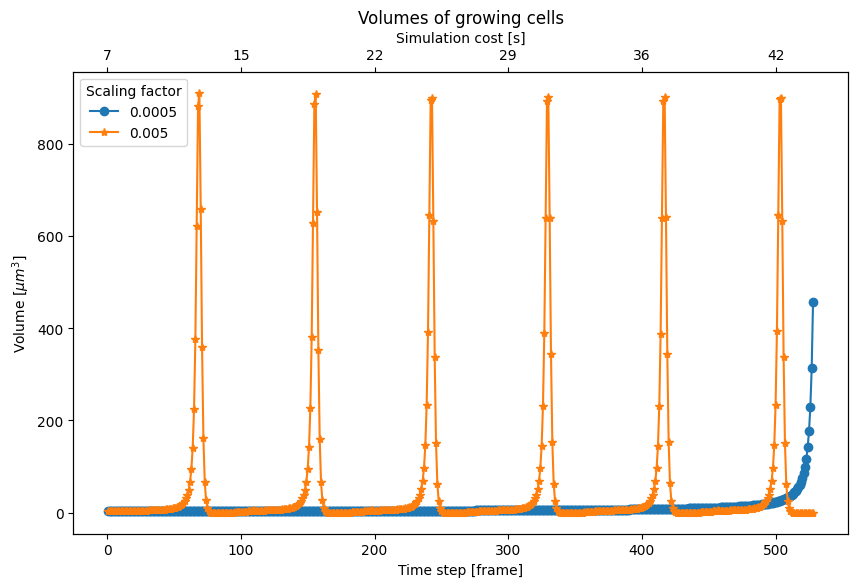

In [53]:
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_2xvolume_1-530/20240109_growth_2xvolume_volumes.json", 'r') as f1:
    volumes1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_2xvolume_1-530/20240109_growth_2xvolume_times.json", 'r') as f1:
    times1 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_2xvolume_1-530/20240109_growth_2xvolume_frame_cells.json", 'r') as f1:
    frames1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_2xvolume_1-530/20240109_growth_2xvolume_s0.005_volumes.json", 'r') as f1:
    volumes2 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_2xvolume_1-530/20240109_growth_2xvolume_s0.005_times.json", 'r') as f1:
    times2 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_2xvolume_1-530/20240109_growth_2xvolume_s0.005_frame_cells.json", 'r') as f1:
    frames2 = json.load(f1)
    
# FPS (frames per second)
fps = 24

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twiny()  # Create a secondary x-axis

scaling_factors = [0.0005, 0.005, 0.05, 0.5]

count = 0
for cell_name, volumes in volumes1.items():
    frames = frames1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, '-o', label=scaling_factors[0])
    count += 1

print(count)

count = 0
for cell_name, volumes in volumes2.items():
    frames = frames2[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, '-*', label=scaling_factors[1])
    count += 1

print(count)

# Plotting the secondary x-axis with the converted numerical data at regular intervals
keys = list(times1.keys())[::82]  # Select keys at regular intervals
values = [times1[key] for key in keys]  # Corresponding values

ax2.set_xlim(ax1.get_xlim())  # Set limits to match the primary x-axis
#ax2.set_xticks(map(int, keys))  # Set the ticks using the selected keys
ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


ax2.set_xlabel('simulation cost [s]')

# Convert frame numbers to time in seconds
# times = [sim_time for sim_time in frame_data]
# ax2.plot(times, alpha=0)  # Plotting on the secondary x-axis

ax1.set_xlabel('Time step [frame]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')
ax2.set_xlabel(r'Simulation cost [s]')

ax1.set_title('Volumes of growing cells')
ax1.legend(title='Scaling factor')  # Legend for the primary x-axis plot
# ax1.grid(True)

# Saving the plot
plt.savefig("20240109_growth_2xvolume.png", transparent=False, dpi=500)

plt.show()

1
1
1


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_12879/4042897072.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


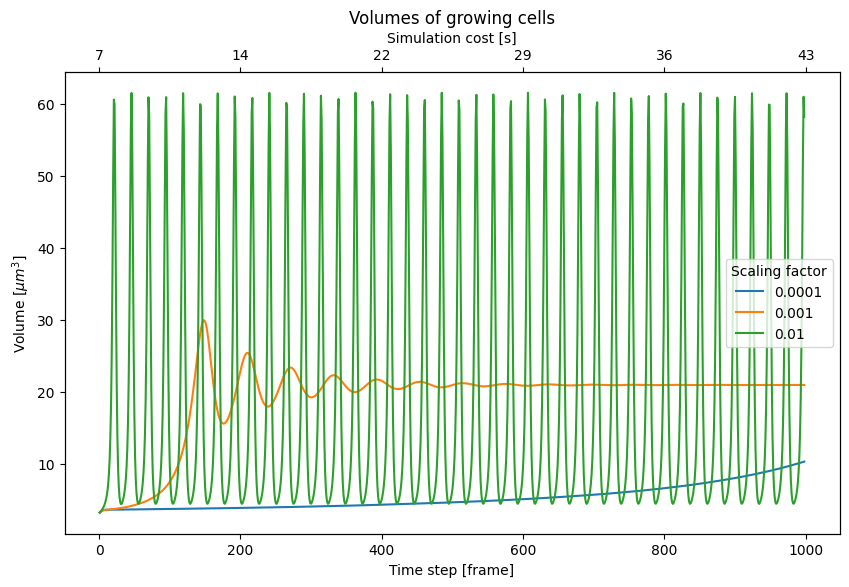

In [59]:
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.0001_volumes.json", 'r') as f1:
    volumes1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.0001_times.json", 'r') as f1:
    times1 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.0001_frame_cells.json", 'r') as f1:
    frames1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.001_volumes.json", 'r') as f1:
    volumes2 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.001_times.json", 'r') as f1:
    times2 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.001_frame_cells.json", 'r') as f1:
    frames2 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.01_volumes.json", 'r') as f1:
    volumes3 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.01_times.json", 'r') as f1:
    times3 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.01_frame_cells.json", 'r') as f1:
    frames3 = json.load(f1)


import matplotlib.pyplot as plt

# FPS (frames per second)
fps = 24

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twiny()  # Create a secondary x-axis

scaling_factors = [0.0001, 0.001, 0.01]

count = 0
for cell_name, volumes in volumes1.items():
    frames = frames1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[0])
    count += 1

print(count)

count = 0
for cell_name, volumes in volumes2.items():
    frames = frames2[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[1])
    count += 1

print(count)

count = 0
for cell_name, volumes in volumes3.items():
    frames = frames3[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[2])
    count += 1

print(count)

# Plotting the secondary x-axis with the converted numerical data at regular intervals
keys = list(times1.keys())[::82]  # Select keys at regular intervals
values = [times1[key] for key in keys]  # Corresponding values

ax2.set_xlim(ax1.get_xlim())  # Set limits to match the primary x-axis
#ax2.set_xticks(map(int, keys))  # Set the ticks using the selected keys
ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


ax2.set_xlabel('simulation cost [s]')

# Convert frame numbers to time in seconds
# times = [sim_time for sim_time in frame_data]
# ax2.plot(times, alpha=0)  # Plotting on the secondary x-axis

ax1.set_xlabel('Time step [frame]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')
ax2.set_xlabel(r'Simulation cost [s]')

ax1.set_title('Volumes of growing cells')
ax1.legend(title='Scaling factor')  # Legend for the primary x-axis plot
# ax1.grid(True)

# Saving the plot
plt.savefig("20240109_growth_5xvolume.png", transparent=False, dpi=500)

plt.show()